In [ ]:
from tensorflow.keras.datasets import mnist #손글씨 데이터

In [ ]:
data=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
len(data)

2

In [ ]:
print(len(data[0]))
print(len(data[1]))

2
2


In [ ]:
a,b = (1,3)
print(a)
print(b)

1
3


In [ ]:
(X_train,y_train),(X_test,y_test)=data

In [ ]:
X_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [ ]:
X_test.shape,y_test.shape

((10000, 28, 28), (10000,))

### 데이터 시각화

In [ ]:
import matplotlib.pyplot as plt

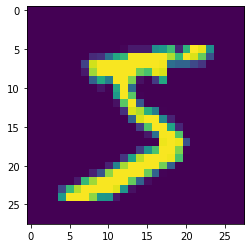

In [ ]:
# 픽셀 정보(숫자)를 이미지화 시켜줌
plt.imshow(X_train[0])

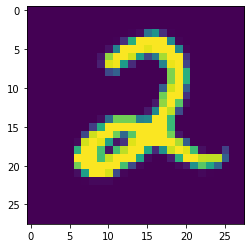

In [ ]:
plt.imshow(X_train[3333])

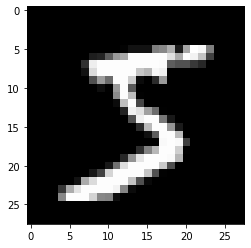

In [ ]:
plt.imshow(X_train[0],cmap='gray')

In [ ]:
y_train[0]

5

In [ ]:

import numpy as np

In [ ]:
# 정답 데이터의 종류
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
#정답 데이터의 빈도수
np.bincount(y_train)

array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949])

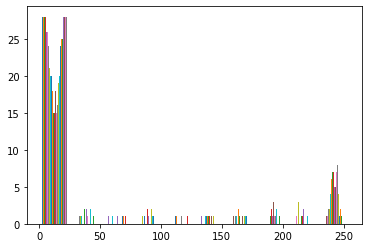

In [ ]:
plt.hist(X_train[0])
plt.show()

### 모델링
1. 모델 구조/설계
2. 모델 학습 및 평가
3. 모델 평가 결과 시각화

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import InputLayer, Dense,Flatten
from tensorflow.keras.utils import to_categorical

In [ ]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [ ]:
#확률 정보로 변경
#딥러닝 다중분류 -최종 예측을 위해 확률 정보를 계산
#확률 정보로 변경 ->분류 모델이 최종 예측 결과를 위해 확률값 계산
to_categorical(y_train[:10])

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [ ]:
# 1. 모델 구조 설계
mnist_model = Sequential() #모델 뼈대
mnist_model.add(InputLayer(input_shape=(28,28)))
mnist_model.add(Flatten())   # 입력된 데이터를 1차원으로 평평하게 만들어주는 층
mnist_model.add(Dense(units=32,activation='sigmoid'))
mnist_model.add(Dense(units=64,activation='sigmoid'))
mnist_model.add(Dense(units=32,activation='sigmoid'))
mnist_model.add(Dense(units=64,activation='sigmoid'))
mnist_model.add(Dense(units=10,activation='softmax'))
#다중분류의출력층 units =클래스의수,활성화 함수 ='softmax'



In [ ]:
# 2. 모델 학습/평가 방법 설정
mnist_model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy']
              )

In [ ]:
mnist_history = mnist_model.fit(X_train,y_train_one_hot,validation_split=0.3,
                                epochs=150)

Epoch 1/150
1313/1313 [==============================] - 6s 4ms/step - loss: 1.3701 - accuracy: 0.5284 - val_loss: 0.8682 - val_accuracy: 0.7293
Epoch 2/150
1313/1313 [==============================] - 4s 3ms/step - loss: 0.8064 - accuracy: 0.7386 - val_loss: 0.6980 - val_accuracy: 0.7818
Epoch 3/150
1313/1313 [==============================] - 4s 3ms/step - loss: 0.6734 - accuracy: 0.7898 - val_loss: 0.5663 - val_accuracy: 0.8298
Epoch 4/150
1313/1313 [==============================] - 4s 3ms/step - loss: 0.5700 - accuracy: 0.8312 - val_loss: 0.5304 - val_accuracy: 0.8417
Epoch 5/150
1313/1313 [==============================] - 4s 3ms/step - loss: 0.5163 - accuracy: 0.8441 - val_loss: 0.4943 - val_accuracy: 0.8485
Epoch 6/150
1313/1313 [==============================] - 4s 3ms/step - loss: 0.4898 - accuracy: 0.8518 - val_loss: 0.4626 - val_accuracy: 0.8646
Epoch 7/150
1313/1313 [==============================] - 4s 3ms/step - loss: 0.4553 - accuracy: 0.8634 - val_loss: 0.4487 - val_ac

<function matplotlib.pyplot.show(*args, **kw)>

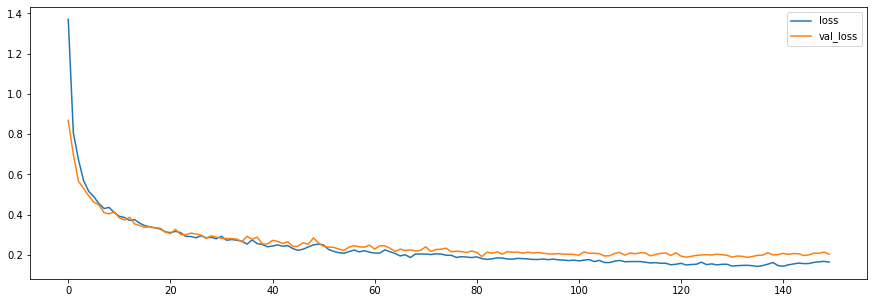

In [ ]:
# 3. 모델 학습 및 학습결과 시각화
plt.figure(figsize=(15,5))
plt.plot(mnist_history.history['loss'],label='loss')
plt.plot(mnist_history.history['val_loss'],label='val_loss')
plt.legend()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

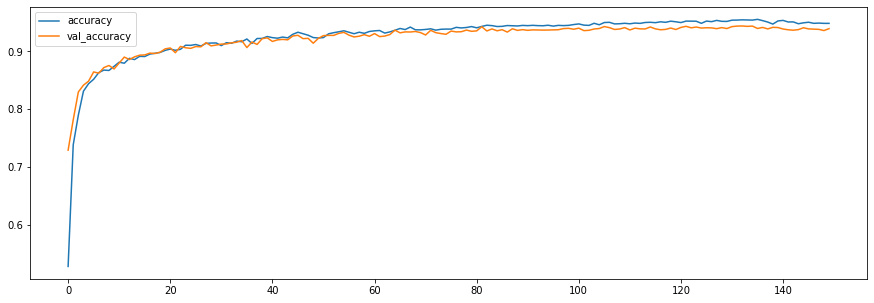

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(mnist_history.history['accuracy'],label='accuracy')
plt.plot(mnist_history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show

In [ ]:
# 4. 모델 평가
mnist_model.evaluate(X_test,y_test_one_hot)

313/313 [==============================] - 1s 2ms/step - loss: 0.1983 - accuracy: 0.9439


[0.19828340411186218, 0.9438999891281128]

In [ ]:
import nltk
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [ ]:
pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
nltk.download('treebank')








[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.


True

In [ ]:
tagged_sentences = nltk.corpus.treebank.tagged_sents()
print("품사 태깅이 된 문장 개수: ", len(tagged_sentences))

품사 태깅이 된 문장 개수:  3914


In [ ]:
print(tagged_sentences[0])

[('Pierre', 'NNP'), ('Vinken', 'NNP'), (',', ','), ('61', 'CD'), ('years', 'NNS'), ('old', 'JJ'), (',', ','), ('will', 'MD'), ('join', 'VB'), ('the', 'DT'), ('board', 'NN'), ('as', 'IN'), ('a', 'DT'), ('nonexecutive', 'JJ'), ('director', 'NN'), ('Nov.', 'NNP'), ('29', 'CD'), ('.', '.')]


In [ ]:
sentences, pos_tags = [], [] 
for tagged_sentence in tagged_sentences: # 3,914개의 문장 샘플을 1개씩 불러온다.
    sentence, tag_info = zip(*tagged_sentence) # 각 샘플에서 단어들은 sentence에 품사 태깅 정보들은 tag_info에 저장한다.
    sentences.append(list(sentence)) # 각 샘플에서 단어 정보만 저장한다.
    pos_tags.append(list(tag_info)) # 각 샘플에서 품사 태깅 정보만 저장한다.

In [ ]:
print(sentences[0])
print(pos_tags[0])

['Pierre', 'Vinken', ',', '61', 'years', 'old', ',', 'will', 'join', 'the', 'board', 'as', 'a', 'nonexecutive', 'director', 'Nov.', '29', '.']
['NNP', 'NNP', ',', 'CD', 'NNS', 'JJ', ',', 'MD', 'VB', 'DT', 'NN', 'IN', 'DT', 'JJ', 'NN', 'NNP', 'CD', '.']


In [ ]:
print(sentences[8])
print(pos_tags[8])

['We', "'re", 'talking', 'about', 'years', 'ago', 'before', 'anyone', 'heard', 'of', 'asbestos', 'having', 'any', 'questionable', 'properties', '.']
['PRP', 'VBP', 'VBG', 'IN', 'NNS', 'IN', 'IN', 'NN', 'VBD', 'IN', 'NN', 'VBG', 'DT', 'JJ', 'NNS', '.']


샘플의 최대 길이 : 271
샘플의 평균 길이 : 25.722024


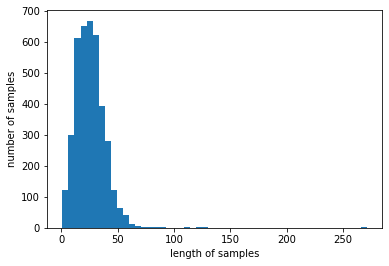

In [ ]:
print('샘플의 최대 길이 : %d' % max(len(l) for l in sentences))
print('샘플의 평균 길이 : %f' % (sum(map(len, sentences))/len(sentences)))
plt.hist([len(s) for s in sentences], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
def tokenize(samples):
  tokenizer = Tokenizer()
  tokenizer.fit_on_texts(samples)
  return tokenizer

In [ ]:
src_tokenizer = tokenize(sentences)
tar_tokenizer = tokenize(pos_tags)

In [ ]:
vocab_size = len(src_tokenizer.word_index) + 1
tag_size = len(tar_tokenizer.word_index) + 1
print('단어 집합의 크기 : {}'.format(vocab_size))
print('태깅 정보 집합의 크기 : {}'.format(tag_size))

단어 집합의 크기 : 11388
태깅 정보 집합의 크기 : 47


In [ ]:
X_train = src_tokenizer.texts_to_sequences(sentences)
y_train = tar_tokenizer.texts_to_sequences(pos_tags)

In [ ]:
print(X_train[:2])
print(y_train[:2])

[[5601, 3746, 1, 2024, 86, 331, 1, 46, 2405, 2, 131, 27, 6, 2025, 332, 459, 2026, 3], [31, 3746, 20, 177, 4, 5602, 2915, 1, 2, 2916, 637, 147, 3]]
[[3, 3, 8, 10, 6, 7, 8, 21, 13, 4, 1, 2, 4, 7, 1, 3, 10, 9], [3, 3, 17, 1, 2, 3, 3, 8, 4, 3, 19, 1, 9]]


In [ ]:
max_len = 150
X_train = pad_sequences(X_train, padding='post', maxlen=max_len)
y_train = pad_sequences(y_train, padding='post', maxlen=max_len)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=.2, random_state=777)

In [ ]:
print('훈련 샘플 문장의 크기 : {}'.format(X_train.shape))
print('훈련 샘플 레이블의 크기 : {}'.format(y_train.shape))
print('테스트 샘플 문장의 크기 : {}'.format(X_test.shape))
print('테스트 샘플 레이블의 크기 : {}'.format(y_test.shape))

훈련 샘플 문장의 크기 : (3131, 150)
훈련 샘플 레이블의 크기 : (3131, 150)
테스트 샘플 문장의 크기 : (783, 150)
테스트 샘플 레이블의 크기 : (783, 150)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, InputLayer, Bidirectional, TimeDistributed, Embedding
from tensorflow.keras.optimizers import Adam

embedding_dim = 128
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, mask_zero=True))
model.add(Bidirectional(LSTM(hidden_units, return_sequences=True)))
model.add(TimeDistributed(Dense(tag_size, activation=('softmax'))))

model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(0.001), metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=128, epochs=7, validation_data=(X_test, y_test))

Epoch 1/7
25/25 [==============================] - 47s 1s/step - loss: 0.5924 - accuracy: 0.1316 - val_loss: 0.5153 - val_accuracy: 0.1923
Epoch 2/7
25/25 [==============================] - 32s 1s/step - loss: 0.5024 - accuracy: 0.1779 - val_loss: 0.4788 - val_accuracy: 0.2105
Epoch 3/7
25/25 [==============================] - 36s 1s/step - loss: 0.4477 - accuracy: 0.3570 - val_loss: 0.3951 - val_accuracy: 0.4523
Epoch 4/7
25/25 [==============================] - 32s 1s/step - loss: 0.3354 - accuracy: 0.5212 - val_loss: 0.2678 - val_accuracy: 0.6269
Epoch 5/7
25/25 [==============================] - 33s 1s/step - loss: 0.2133 - accuracy: 0.7178 - val_loss: 0.1639 - val_accuracy: 0.7822
Epoch 6/7
25/25 [==============================] - 33s 1s/step - loss: 0.1216 - accuracy: 0.8606 - val_loss: 0.1000 - val_accuracy: 0.8774
Epoch 7/7
25/25 [==============================] - 33s 1s/step - loss: 0.0697 - accuracy: 0.9237 - val_loss: 0.0706 - val_accuracy: 0.9013


In [ ]:
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test, y_test)[1]))

25/25 [==============================] - 4s 168ms/step - loss: 0.0706 - accuracy: 0.9013

 테스트 정확도: 0.9013


In [ ]:
index_to_word = src_tokenizer.index_word
index_to_tag = tar_tokenizer.index_word

i = 10 # 확인하고 싶은 테스트용 샘플의 인덱스.
y_predicted = model.predict(np.array([X_test[i]])) # 입력한 테스트용 샘플에 대해서 예측값 y를 리턴
y_predicted = np.argmax(y_predicted, axis=-1) # 확률 벡터를 정수 레이블로 변환.

print("{:15}|{:5}|{}".format("단어", "실제값", "예측값"))
print(35 * "-")

for word, tag, pred in zip(X_test[i], y_test[i], y_predicted[0]):
    if word != 0: # PAD값은 제외함.
        print("{:17}: {:7} {}".format(index_to_word[word], index_to_tag[tag].upper(), index_to_tag[pred].upper()))

1/1 [==============================] - 4s 4s/step
단어             |실제값  |예측값
-----------------------------------
in               : IN      IN
addition         : NN      NN
,                : ,       ,
buick            : NNP     NNP
is               : VBZ     VBZ
a                : DT      DT
relatively       : RB      RB
respected        : VBN     VBN
nameplate        : NN      NN
among            : IN      IN
american         : NNP     NNP
express          : NNP     NNP
card             : NN      NN
holders          : NNS     NNS
,                : ,       ,
says             : VBZ     VBZ
0                : -NONE-  -NONE-
*t*-1            : -NONE-  -NONE-
an               : DT      DT
american         : NNP     NNP
express          : NNP     NNP
spokeswoman      : NN      NN
.                : .       .


In [ ]:
import re

In [ ]:
text="""
임혜성

엠소프트
트

야


HyeSeong Lim Researcher

에너지 조선 ICT MASS
드론제조 1071 BigData AR

ADDRESS 전라남도 나주시 도민길 50,(빚가람동) 58323
50, Domin-gil, Naju-si, jeollanam-do. Korea

INNO-BIZ 기업

MAIN-BIZ 기엄

전남국방벤처센터 혐약기업
한국전력 스타기업
전라남도 스타기업
전라남도 유망중소기업
청년친화 강소기업

FAX +82.61.333.8516

TEL +82.61.333.8517

E-MAIL hs.lim@smsoft.co.kr
0
MOBILE +82.10.6648.7547

HOMEPAGE www.smsoft.co.kr
"""



In [ ]:
print(text)


임혜성

엠소프트
트

야


HyeSeong Lim Researcher

에너지 조선 ICT MASS
드론제조 1071 BigData AR

ADDRESS 전라남도 나주시 도민길 50,(빚가람동) 58323
50, Domin-gil, Naju-si, jeollanam-do. Korea

INNO-BIZ 기업

MAIN-BIZ 기엄

전남국방벤처센터 혐약기업
한국전력 스타기업
전라남도 스타기업
전라남도 유망중소기업
청년친화 강소기업

FAX +82.61.333.8516

TEL +82.61.333.8517

E-MAIL hs.lim@smsoft.co.kr
0
MOBILE +82.10.6648.7547

HOMEPAGE www.smsoft.co.kr



In [ ]:
# a = re.compile(r"\b[A-Z0-9._%+-]+@[A-Z0-9.-]+\.[A-Z]{2,4}\b")
# re_list=re.findall(a,text)
# print(re_list)

pattern = '[A-Z0-9._%+-]+@[A-Z0-9.-]+\.[A-Z]{2,4}'

#컴파일 (IGNORECASE는 대소문자 구분 안한다는 의미)
regex = re.compile(pattern, flags=re.IGNORECASE)

#이메일 주소만 추리기
print("E-mail:",regex.findall(text))

E-mail: ['hs.lim@smsoft.co.kr']


In [ ]:
# text = "우리집 집전화 번호는 00-111-2222이고, 나의 핸드폰 번호는 333-4444-5555이다."
# phone_number_list = re.compile('\d{2,3}-\d{3,4}-\d{4}').finditer(text)
# for phone_number in phone_number_list: # 전화번호와 인덱스를 출력한다.
# 	print(phone_number, phone_number)   
 

#text2='10.6648.7547,10 6648 8888,10-1111-2222'
#  "(01)\d{1}\s\d{3,4}\s\d{4}$"



#pattern2 = "10[.]\d{4}[.]\d{4}$|10.\d{4}.\d{4}$"
#pattern2 = '\d{2}[.]\d{3,4}[.]\d{4}|\d{2}.\d{3,4}.\d{4}' #모든숫자뽑기
pattern2 = '[01|10]\d{1,2}[.]\d{3,4}[.]\d{4}|[01|10]\d{1,2}.\d{3,4}.\d{4}|[01|10]\d{1,2}-\d{3,4}-\d{4}'

#컴파일 (IGNORECASE는 대소문자 구분 안한다는 의미)
regex2 = re.compile(pattern2, flags=re.IGNORECASE)

#번호만 추리기
print("폰번호:",regex2.findall(text)[0])


폰번호: 10.6648.7547


In [ ]:
pattern3 = '[임]+[ㄱ-ㅣ가-힣]+[ㄱ-ㅣ가-힣]'

#컴파일 (IGNORECASE는 대소문자 구분 안한다는 의미)
regex3 = re.compile(pattern3, flags=re.IGNORECASE)

#이름만 추리기 테스트
print("이름:",regex3.findall(text)[0])

이름: 임혜성
